**Regresión múltiple lineal**

🧪 Tu tarea:
1. Carga estos datos en un DataFrame.

2. Entrena un modelo de regresión lineal múltiple usando las tres variables predictoras:

*  Tamaño (m²)
*  Número de habitaciones
*  Edad (años)

3. Muestra los coeficientes y la intersección del modelo.

4. Realiza una predicción del precio para una casa con:



*   Tamaño = 110 m²
*   Habitaciones = 3
*   Edad = 3 años

5. Calcula y muestra el R² del modelo.

6. (Opcional) Normaliza los datos antes del ajuste para practicar esa técnica.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('rm.csv')
df.head(2)

,Tamaño_m2,Habitaciones,Edad_anios,Precio_mil_USD
0,50,2,10,150
1,60,2,8,180


In [ ]:
#seleccionar las variables (columnas)
x1 = 'Tamaño_m2'
x2 = 'Habitaciones'
x3 = 'Edad_anios'
y = 'Precio_mil_USD'

Crear modelo de regresión, entrenar y obtener coeficientes

In [ ]:
variables__x = [x1,x2,x3]
variable_y = y
model = LinearRegression()
model.fit(df[variables__x],df[variable_y])
print(f"Coeficientes: {model.coef_}, Intersección: {model.intercept_}")

Coeficientes: [ 1.70815367  0.67620541 -7.19129753], Intersección: 137.74010192081533


Predecir precio de una casa de tamaño: 110 m², 3 habitaciones y 3 años de edad

In [ ]:
Size = 110
rooms = 3
age = 3
prediccion_nueva = pd.DataFrame({x1: [Size], x2: [rooms], x3: [age]})
print(f"El precio para una casa con tamaño: {Size}, habitaciones: {rooms} y edad: {age} es de: {model.predict(prediccion_nueva)[0]}")

El precio para una casa con tamaño: 110, habitaciones: 3 y edad: 3 es de: 306.0917287338299


Encontrar $R^{2}$

In [ ]:
yPredict = model.predict(df[variables__x])
print(f'R²: {r2_score(df[y],yPredict)}')

R²: 0.9926172211977209


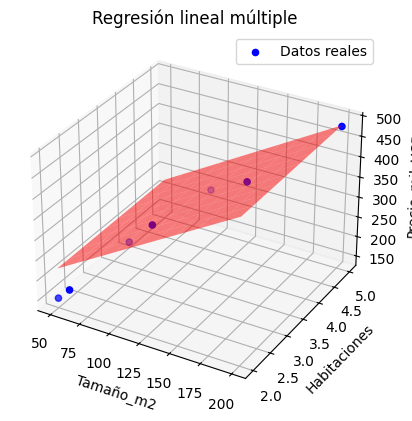

In [ ]:
# Asignar nombres de columnas a variables
x1 = 'Tamaño_m2'
x2 = 'Habitaciones'
y = 'Precio_mil_USD'

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos reales
ax.scatter(df[x1], df[x2], df[y], color='blue', label='Datos reales')

# Crear un meshgrid para el plano
x = np.linspace(df[x1].min(), df[x1].max(), num=10)
y_grid = np.linspace(df[x2].min(), df[x2].max(), num=10)
x, y_grid = np.meshgrid(x, y_grid)

# Calcular z usando los coeficientes del modelo
z = model.intercept_ + model.coef_[0] * x + model.coef_[1] * y_grid

# Graficar el plano del modelo
ax.plot_surface(x, y_grid, z, alpha=0.5, color='red')

# Etiquetas
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel('Precio_mil_USD')
ax.set_title("Regresión lineal múltiple")
plt.legend()
plt.show()